In [ ]:
import pandas as pd
import numpy as np
import regex as re

In [ ]:
# read in dataframe
speeches = pd.read_csv("../data/speeches/")

In [ ]:
# clean df

# set dtype and create year column (robust parsing)
# preserve original for debugging
speeches['date_original'] = speeches['date']
speeches['date'] = pd.to_datetime(speeches['date'], errors='coerce', infer_datetime_format=True, utc=True)
speeches = speeches.sort_values('date').reset_index(drop=True)
# year as nullable integer
speeches['year'] = speeches['date'].dt.year.astype('Int64')
# keeping only necessary columns
speeches_clean = speeches[['title', 'date', 'transcript', 'president', 'year']]
# creating new columns
speeches_clean['count_american'] = speeches_clean['transcript'].str.count(r'\b(american|americans)\b', flags=re.IGNORECASE)
speeches_clean['inaugural'] = np.where(speeches_clean['title'].str.lower().str.contains('inaugural'), 1, 0)
speeches_clean['sou'] = np.where(speeches_clean['title'].str.lower().str.contains('state of the union'), 1, 0)

/var/folders/7w/t6w_w15x5nb5xfxzxr9z18g80000gn/T/ipykernel_93783/1159298677.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  speeches['date'] = pd.to_datetime(speeches['date'], errors='coerce', infer_datetime_format=True, utc=True)
/var/folders/7w/t6w_w15x5nb5xfxzxr9z18g80000gn/T/ipykernel_93783/1159298677.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeches_clean['count_american'] = speeches_clean['transcript'].str.count(r'\b(american|americans)\b', flags=re.IGNORECASE)
/var/folders/7w/t6w_w15x5nb5xfxzxr9z18g80000gn/T/

In [231]:
speeches_clean.head()

,title,date,transcript,president,year,count_american,inaugural,sou
0,"April 30, 1789: First Inaugural Address",1789-04-30 17:59:58+00:00,Fellow Citizens of the Senate and the House of...,George Washington,1789,2,1,0
1,"October 3, 1789: Thanksgiving Proclamation",1789-10-03 17:59:58+00:00,Whereas it is the duty of all Nations to ackno...,George Washington,1789,0,0,0
2,"January 8, 1790: First Annual Message to Congress",1790-01-08 17:59:58+00:00,Fellow Citizens of the Senate and House of Rep...,George Washington,1790,0,0,0
3,"December 8, 1790: Second Annual Message to Con...",1790-12-08 17:59:58+00:00,Fellow citizens of the Senate and House of Rep...,George Washington,1790,1,0,0
4,"December 29, 1790: Talk to the Chiefs and Coun...",1790-12-29 17:59:58+00:00,"I the President of the United States, by my ow...",George Washington,1790,0,0,0


In [232]:
# checking years available
speeches_clean['year'].describe()

count         1054.0
mean     1927.132827
std        66.654425
min           1789.0
25%           1869.0
50%           1938.0
75%           1983.0
max           2025.0
Name: year, dtype: Float64

In [233]:
# creating sub-dfs
state_of_union_speeches = speeches_clean[speeches_clean['sou'] == 1]
inaugural_speeches = speeches_clean[speeches_clean['inaugural'] == 1]

In [234]:
# checking years available
# state_of_union_speeches['year'].describe()
inaugural_speeches['year'].describe()

count         60.0
mean        1907.0
std      69.856997
min         1789.0
25%         1848.0
50%         1907.0
75%         1966.0
max         2025.0
Name: year, dtype: Float64

In [235]:
# word counts
print(speeches_clean['transcript'].str.split().str.len().mean())
print(inaugural_speeches['transcript'].str.split().str.len().mean())
print(state_of_union_speeches['transcript'].str.split().str.len().mean())

3963.7419354838707
2319.9166666666665
5835.385714285714


<Axes: title={'center': 'Mentions of the word "American" in State of the Union addresses'}, xlabel='year', ylabel='count'>

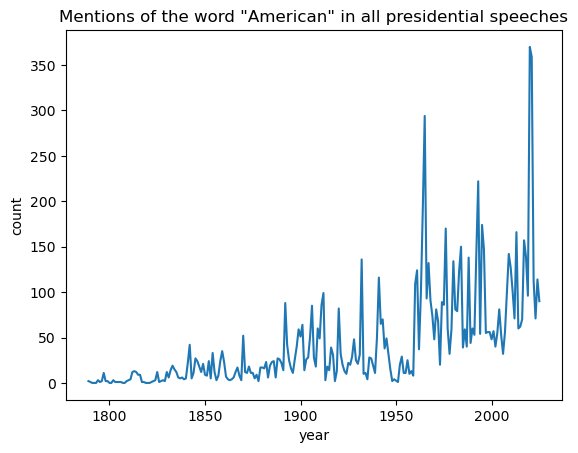

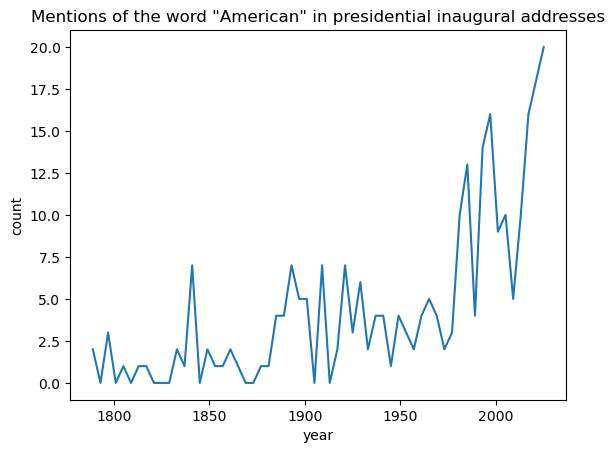

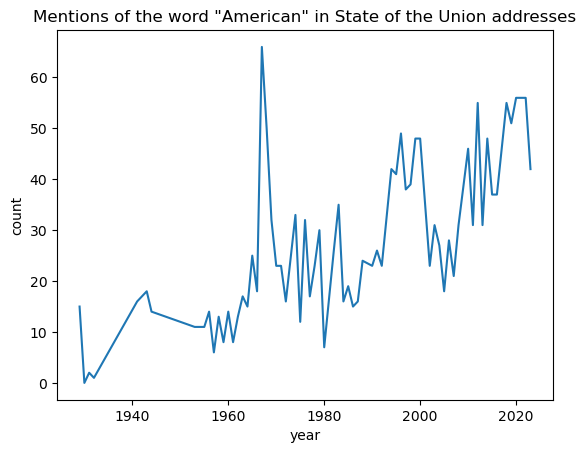

In [238]:
# visualizing 

speeches_clean.drop(columns=['date']).groupby('year').sum()[['count_american']].plot(
    title='Mentions of the word "American" in all presidential speeches', 
    legend=False,
    ylabel='count')

inaugural_speeches.drop(columns=['date']).groupby('year').sum()[['count_american']].plot(
    title='Mentions of the word "American" in presidential inaugural addresses', 
    legend=False,
    ylabel='count')

state_of_union_speeches.drop(columns=['date']).groupby('year').sum()[['count_american']].plot(
    title='Mentions of the word "American" in State of the Union addresses', 
    legend=False,
    ylabel='count')
